# Tesla stock price predictor

## 1. Define the Problem
Objective: Predict future stock prices of Tesla (e.g., closing price for the next trading day).
Type of problem: Regression (predicting a continuous value).
## 2. Collect and Prepare Data
Historical Stock Prices: Use APIs like Yahoo Finance, Alpha Vantage, or Quandl to get historical stock prices.
Features: Consider not only historical prices (open, high, low, close, adjusted close, volume) but also technical indicators (moving averages, RSI, MACD), and possibly fundamental indicators (PE ratio, EPS, market cap).
External Data: Economic indicators, competitor stock prices, market sentiment, news articles, and social media posts can also be predictive.
Data Splitting: Split your data into training, validation, and test sets.
## 3. Data Preprocessing
Cleaning: Handle missing values, outliers, and errors in your data.
Transformation: Normalize or standardize your data if necessary, especially for neural network models.
Feature Engineering: Create new features that might have predictive power (e.g., rolling averages, lag features).
Feature Selection: Choose the most relevant features to avoid overfitting and reduce training time.
## 4. Choose a Model
Baseline Model: Start with simple models like linear regression to establish a baseline.
Advanced Models: Experiment with more complex models such as ARIMA for time series, LSTM (Long Short-Term Memory networks), GRU (Gated Recurrent Units), or Convolutional Neural Networks adapted for sequence data.
Ensemble Models: Combine the predictions of several models to improve accuracy.
## 5. Train the Model
Cross-Validation: Use techniques like k-fold cross-validation to assess model performance.
Hyperparameter Tuning: Optimize the model's hyperparameters using grid search or random search.
Performance Metrics: Evaluate using metrics like RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and potentially directional accuracy.
## 6. Evaluate the Model
Test Set Evaluation: Use your hold-out test set to evaluate the model's performance.
Backtesting: Simulate trading using historical data to see how well your model would have performed.
Bias-Variance Tradeoff: Check for overfitting or underfitting and adjust complexity accordingly.
## 7. Deploy the Model
Real-time Data: Ensure your model can handle real-time data feeds for live predictions.
Infrastructure: Set up the necessary infrastructure to support model deployment (servers, databases, etc.).
Monitoring: Implement monitoring to track model performance over time and detect when it needs retraining.
## 8. Compliance and Risks
Regulatory Compliance: Understand and comply with financial regulations regarding the use of algorithms in trading.
Risk Management: Recognize that predictions are probabilistic, and incorporate risk management strategies.
Python Libraries to Consider
pandas for data manipulation.
numpy for numerical computations.
matplotlib and seaborn for data visualization.
scikit-learn for basic ML models and preprocessing.
statsmodels for statistical models.
tensorflow or keras for neural networks.
alpha_vantage, yfinance, or quandl for data collection.


In [2]:
# Model to predict the price of Tesla stock
# Importing the libraries
import numpy as np                          # For mathematical calculations
import matplotlib.pyplot as plt             # For plotting graphs
import matplotlib.dates as mdates           # For formatting dates
import pandas as pd                         # For data manipulation
import seaborn as sns                       # For plotting graphs
from sklearn import linear_model            # For linear regression

%matplotlib inline

In [11]:
# Trying to get the data for Tesla stock

tesla_df = pd.read_csv('TSLA.csv')                      # Reading the data from the csv file, using the Date column as index
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])     # Converting the Date column to datetime format
tesla_df.set_index('Date', inplace=True)                # Setting the Date column as index

tesla_df.head()                                         # Printing the first 5 rows of the dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


### Plotting the whole dataframe to get a vizual represantation

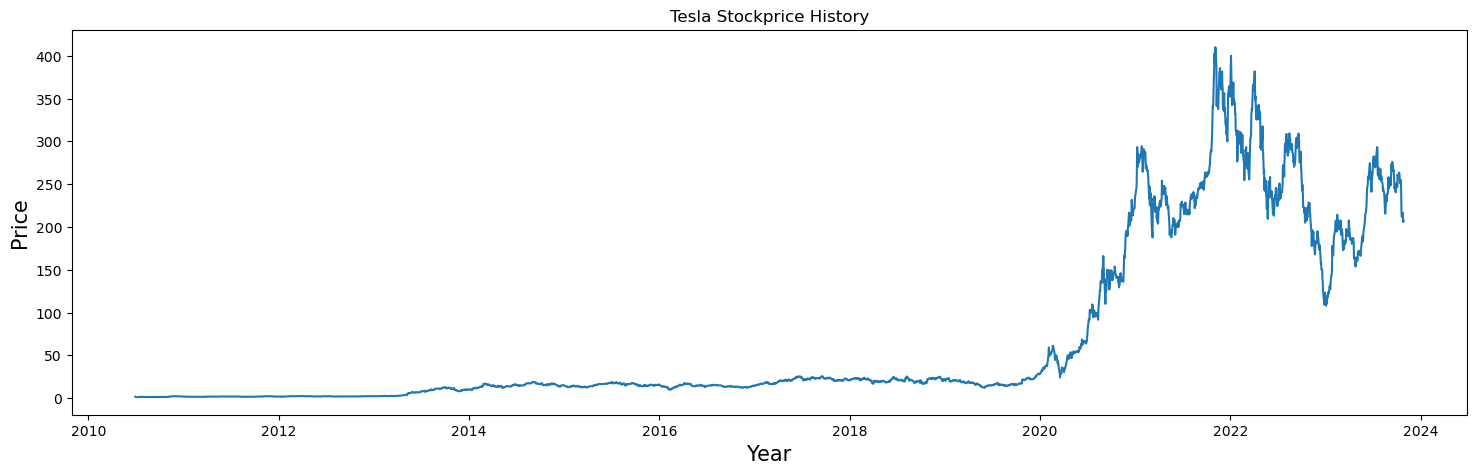

In [15]:
# Plotting all the data with years on the x-axis and price on the y-axis
plt.figure(figsize=(18,5))
plt.title('Tesla Stockprice History')               # Title of the plot ENDRE DENNE
plt.plot(tesla_df['Close'])                         # Plotting the data (Closing price is what we want)
plt.xlabel('Year', fontsize=15)                     # Label on the x-axis
plt.ylabel('Price', fontsize=15)                    # Label on the y-axis
plt.show()                                          # Showing the plot


### Identifying the target variable

The target variable for my models predictions is the closing stock price.

The other stock price variables will be used as features:
- Open
- High
- Low
- Volume

In [16]:
# Collecting target variable in a vector y
y_target = tesla_df['Close']                        # Collecting the closing price in a vector y_target
y_target.head()                                     # Printing the first 5 rows of the vector

Date
2010-06-30    1.588667
2010-07-01    1.464000
2010-07-02    1.280000
2010-07-06    1.074000
2010-07-07    1.053333
Name: Close, dtype: float64

In [17]:
# Collecting the features in a dataframe X
X_features = tesla_df[['Open', 'High', 'Low', 'Volume']]    # Collecting the features in a dataframe X_features
X_features.head()                                           # Printing the first 5 rows of the dataframe

,Open,High,Low,Volume
Date,,,,
2010-06-30,1.719333,2.028000,1.553333,257806500
2010-07-01,1.666667,1.728000,1.351333,123282000
2010-07-02,1.533333,1.540000,1.247333,77097000
2010-07-06,1.333333,1.333333,1.055333,103003500
2010-07-07,1.093333,1.108667,0.998667,103825500


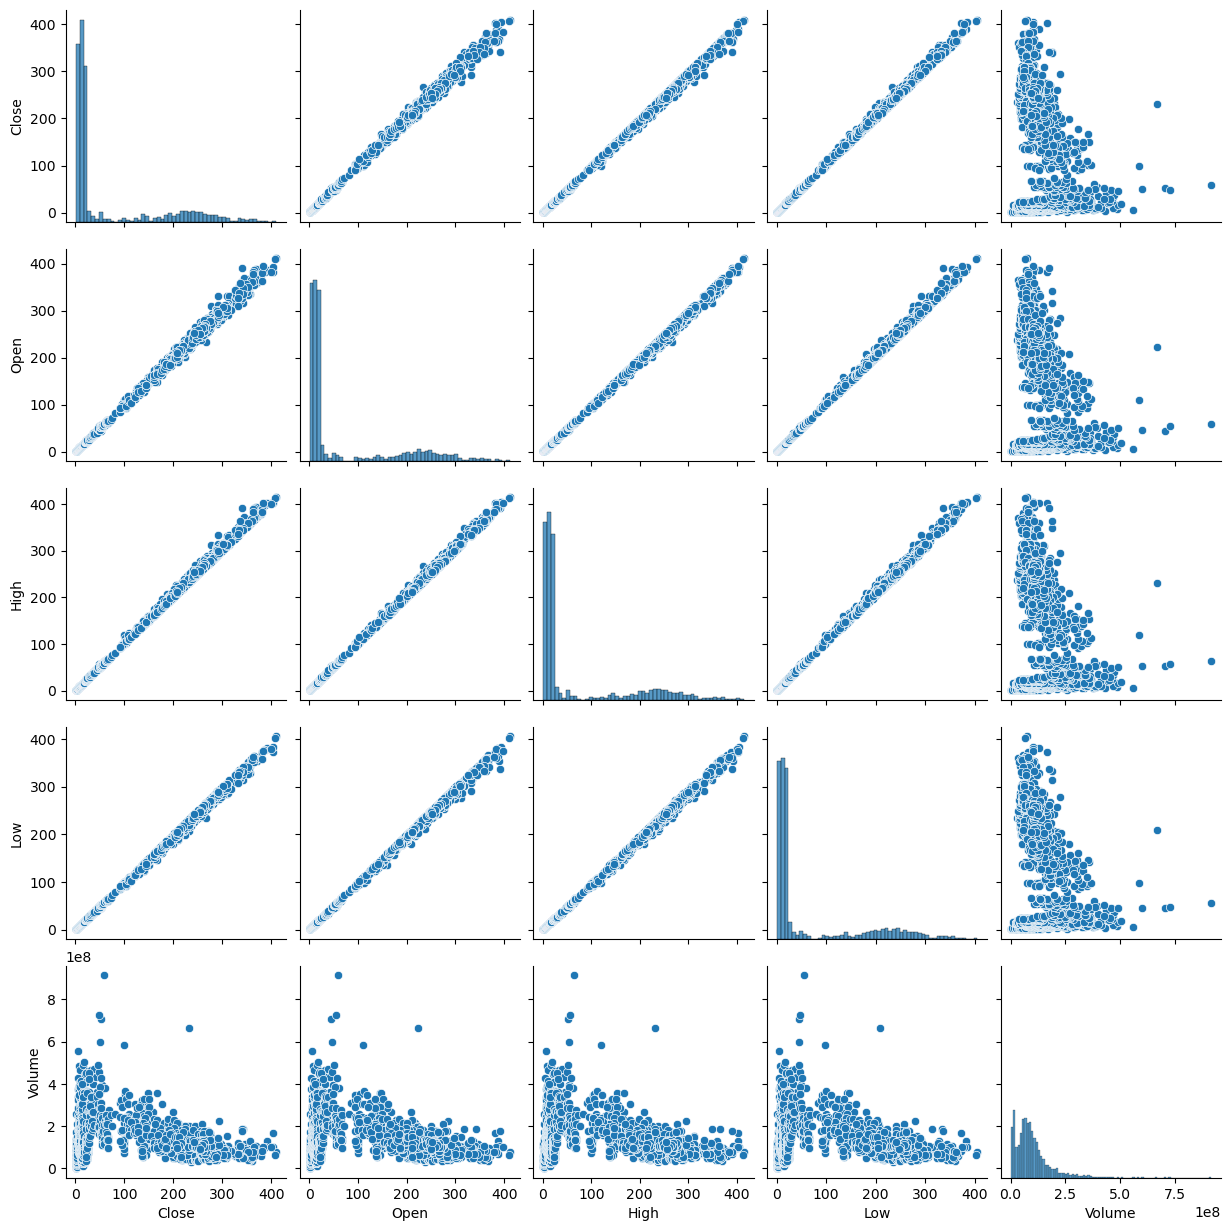

In [18]:
# sns.pairplot(tesla_df[['Close', 'Open', 'High', 'Low', 'Volume']])    # Plotting the features against each other

# Plotting scatter plots for each feature against the target variable
for feature in X_features.columns:
    plt.figure(figsize=(10,6))                                # Setting the size of the plot
    plt.scatter(X_features[feature], y_target, alpha=0.2)     # Plotting the scatter plot
    plt.title('Scatter plot of ' + feature + ' against the target variable')
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Price', fontsize=15)
    plt.show()